In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import itertools
import sys
sys.path.append('..')
from security_game.target import Target

from utils.visualization import plot_animal_locations

from security_game.green_security_game import GreenSecurityGame
from security_game.infra_security_game import InfraSecurityGame

from solvers.mip import mip
from solvers.nash import nash
from solvers.double_oracle import double_oracle
from solvers.double_oracle_sf import double_oracle_sf
from solvers.no_regret import regret_matching
from solvers.simple_sse_lp import solve_sse_lp
from solvers.nfg_sse_lp import solve_general_sum_normal_form
import time
from matplotlib import pyplot as plt
from collections import defaultdict, Counter

In [ ]:
import csv
df = pd.read_csv('etosha.csv', header = 0, delimiter=",", quoting=csv.QUOTE_NONE, encoding='utf-8')
df = df[["individual-local-identifier", "location-lat", "location-long", "timestamp"]]
df.columns = ["animal_id","lat", "long", "timestamp"]

lat_min, lon_min = -19.416379222301813, 16.225642353847586
lat_max, lon_max = -19.062243389734533, 16.834273063191954

coordinate_rectangle = [lat_min, lat_max, lon_min, lon_max]

In [47]:
coordinate_rectangle

[-19.416379222301813,
 -19.062243389734533,
 16.225642353847586,
 16.834273063191954]

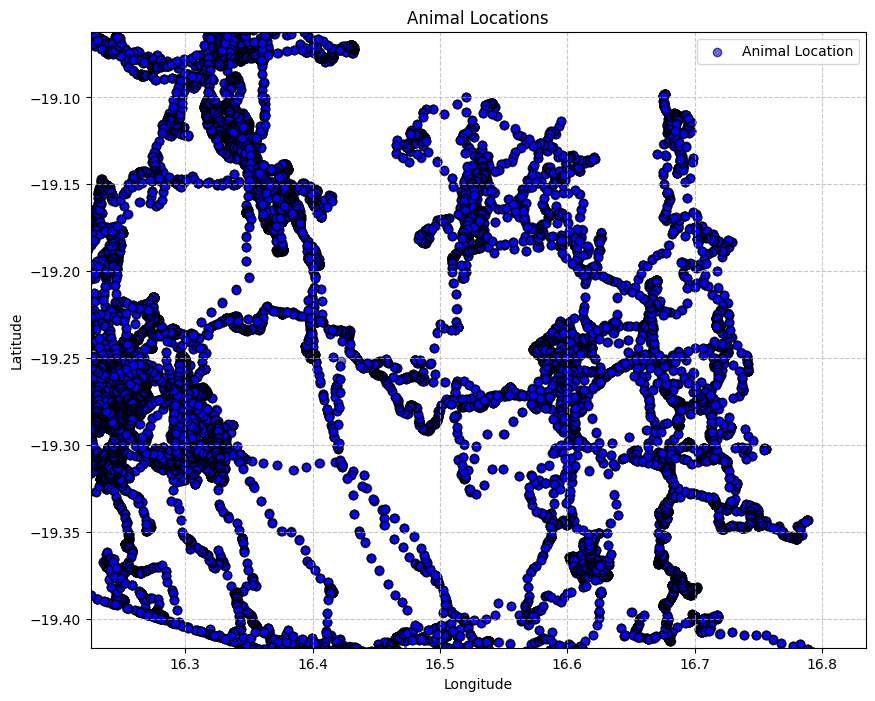

In [3]:
plot_animal_locations(df, coordinate_rectangle)

In [ ]:
halali = (-19.036839154412093, 16.471708788452602)
omutati = (-19.31668834814194, 16.87791731016715)
ondongab = (-19.205402906436444, 16.194226231381293)

schedule_form_kwargs = {
    "schedule_form": True,
    "simple": False,
    "attacker_penalty_factor": 5,
    "defender_penalty_factor": 5
}

general_sum_kwargs = {
    "general_sum": False,
    "attacker_animal_value":  1, 
    "defender_animal_value": 1, 
    "defender_step_cost": 0, 
}

gsg = GreenSecurityGame(df, coordinate_rectangle, "centroid", num_clusters=7, num_rows=6, num_columns=6, escape_line_points=None)
gsg.generate(num_attackers=1, num_defenders=2, 
             home_base_assignments=[(halali, omutati, ondongab),(halali, omutati, ondongab)], 
             num_timesteps=8, 
             generate_utility_matrix=True, 
             defense_time_threshold=2, 
             generate_actions=True, 
             force_return=True,  
             **schedule_form_kwargs,**general_sum_kwargs)

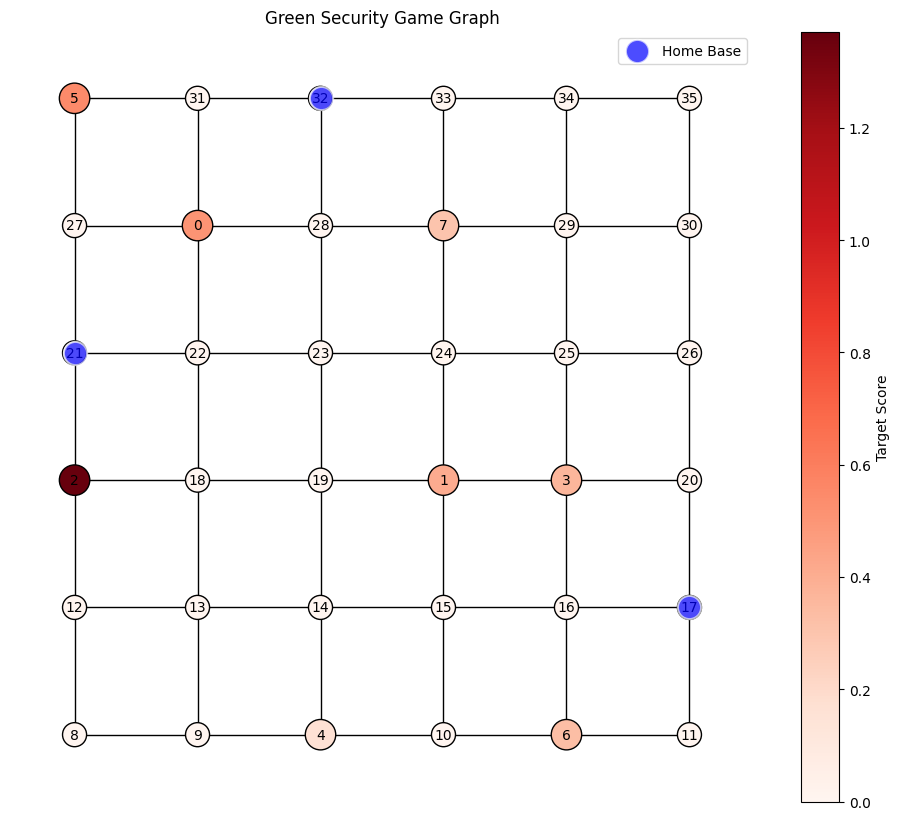

In [51]:
gsg.draw_graph()

In [26]:
D_a, D_d, u = nash(gsg.schedule_form_dict["defender_utility_matrix"])

In [27]:
[(i,p) for i,p in enumerate(D_d) if p != 0]

[(53, 0.05470733511771794),
 (63, 0.06126649436876683),
 (87, 0.024068249067060954),
 (115, 0.24611125886401253),
 (121, 0.3904464753516927),
 (144, 0.19292395373083557),
 (146, 0.030476233499913463)]

In [28]:
u

-0.2437658680941743

In [ ]:
gsg.to_pkl("etosha_sfg_gsg_1.pkl",schedule_form=True)